<a href="https://colab.research.google.com/github/valeriafigueredo-data/Mineracao_de_Texto_e_na_Web/blob/main/5_trabalhofinal_AMAZON_mtw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Final da Disciplina Mineração de Texto e na Web**

**Discente:**

Valéria Cristina A. R. de Figueredo

**DICIONÁRIO**

1. Index            ---------- Index

2. ReviewerName     ---------- Nome da pessoa que fez a revisão

3. Overall          ---------- Avaliação/Classificação do produto

4. ReviewText       ---------- Texto da Avaliação

5. ReviewTime       ---------- Data da Avaliação

6. Day Diff         ---------- Número de Dias desde a avaliação

7. Helpful_yes      ---------- Número de vezes que a avaliação foi considerada útil

8. Helpful_no      ----------  Número de pessoas que não apoiaram o comentário e não acharam a avaliação útil

9. Total_vote      ----------  Número total de votos dados a avaliação

10. Score_pos_neg_diff  ---------- Diferença entre o número de avaliações positivas e negativas

11. Score_average_rating ----------  Média das classificações de um produto ou serviço

12. Wilson_lower_bound   ---------- Estatística usada para estimar a probabilidade de sucesso em um cenário binomial, levando em conta a incerteza nas avaliações.



FONTE DO DATASET: [AMAZON](https://https://www.kaggle.com/datasets/tarkkaanko/amazon/data )

# **1. BIBLIOTECA E IMPORTAÇÃO DOS DADOS**

In [ ]:


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import nltk
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
pip install matplotlib

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/valeriafigueredo-data/datasets/refs/heads/main/amazon_reviews.csv",sep=',')

# **2. ANÁLISE EXPLORATÓRIA**

In [ ]:
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [ ]:
df.describe()

,Unnamed: 0,overall,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
count,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000,4915.000000
mean,2457.000000,4.587589,437.367040,1.311089,0.210376,1.521465,1.100712,0.075468,0.020053
std,1418.982617,0.996845,209.439871,41.619161,4.023296,44.123095,39.367949,0.256062,0.077187
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-130.000000,0.000000,0.000000
25%,1228.500000,5.000000,281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2457.000000,5.000000,431.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3685.500000,5.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4914.000000,5.000000,1064.000000,1952.000000,183.000000,2020.000000,1884.000000,1.000000,0.957544


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4915 non-null   int64  
 1   reviewerName          4914 non-null   object 
 2   overall               4915 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4915 non-null   object 
 5   day_diff              4915 non-null   int64  
 6   helpful_yes           4915 non-null   int64  
 7   helpful_no            4915 non-null   int64  
 8   total_vote            4915 non-null   int64  
 9   score_pos_neg_diff    4915 non-null   int64  
 10  score_average_rating  4915 non-null   float64
 11  wilson_lower_bound    4915 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 460.9+ KB


Os dados possuem 12 colunas, com 4.915 linhas, exceto reviewText e reviewrName. Dessa forma, será removida a NaN da coluna'reviewText'. Também será eliminada a coluna "reviewername".

Ademais, os tipos de dados são números inteiros e float, assim como object (caracteres).

In [ ]:
# Total de NaNs em cada coluna
nan_count = df.isnull().sum()
print(nan_count)

Unnamed: 0              0
reviewerName            1
overall                 0
reviewText              1
reviewTime              0
day_diff                0
helpful_yes             0
helpful_no              0
total_vote              0
score_pos_neg_diff      0
score_average_rating    0
wilson_lower_bound      0
dtype: int64


In [ ]:
# Remover linhas onde 'reviewText' é NaN
df = df.dropna(subset=['reviewText'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4914 entries, 0 to 4914
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4914 non-null   int64  
 1   reviewerName          4913 non-null   object 
 2   overall               4914 non-null   float64
 3   reviewText            4914 non-null   object 
 4   reviewTime            4914 non-null   object 
 5   day_diff              4914 non-null   int64  
 6   helpful_yes           4914 non-null   int64  
 7   helpful_no            4914 non-null   int64  
 8   total_vote            4914 non-null   int64  
 9   score_pos_neg_diff    4914 non-null   int64  
 10  score_average_rating  4914 non-null   float64
 11  wilson_lower_bound    4914 non-null   float64
dtypes: float64(3), int64(6), object(3)
memory usage: 499.1+ KB


In [ ]:
df.drop(columns=['reviewerName'], inplace=True)

 A coluna 'reviewerName' foi apagada afim de seguir a legislação em vigor, como a Lei Geral de Proteção de Dados que salvaguarda dados sensíveis dos indivíduos.


In [ ]:
# Renomear a coluna "Unnamed: 0" para "index"
df.rename(columns={'Unnamed: 0': 'index'}, inplace=True)

In [ ]:
df.head()

,index,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


**Gráfico de Dispersão dos Dados**

<ipython-input-353-f9e533ec2085>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax, grid=False)


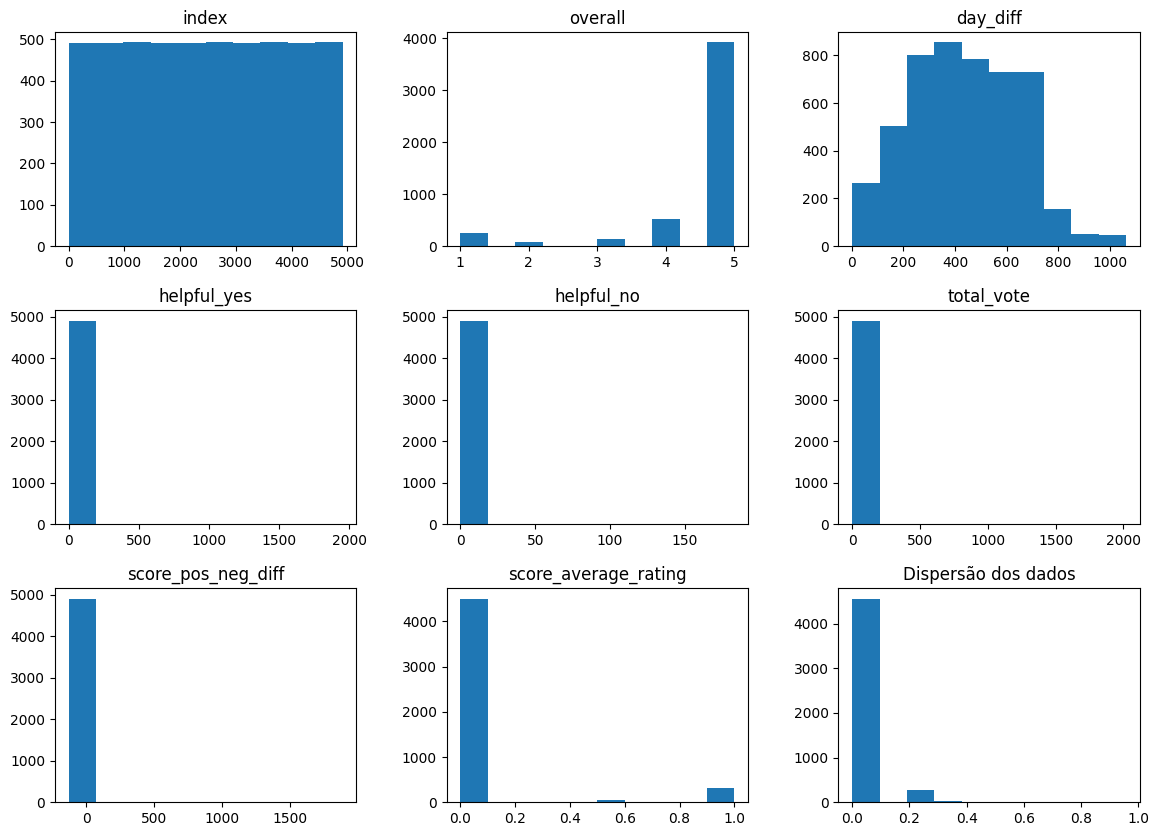

In [ ]:
fig = plt.figure(figsize = (14,10))
ax = fig.gca()
df.hist(ax = ax, grid=False)
plt.title("Dispersão dos dados")
plt.show()

Os dados apresentam elementos únicos em helpful_yes, helpful_no, total_vote e score_pos_neg_diff. O overall, score_average_rating e dispersão dos dados apresentam predominância de um elemento. Portanto, os dados numéricos que percorreram todo o conjunto foi day_diff e index.

# **3. Análise de Sentimento**

# **3.1 Coleta e Análise dos dados da Coluna "reviewText e Overall"**

Nesse tópico serão coletados e analisados os dados, bem como apresentadas nuvens de palavras e a frequência de palavras. A análise de sentimento será feita com base nas seguintes colunas: Overall e ReviewTex. Desse modo, o novo dataframe terá apenas essas colunas para facilitar o trabalho.

**The sentiment labels are:**

1 - negative
2 - somewhat negative
3 - neutral
4 - somewhat positive
5 - positive

In [ ]:
# colunas que serão mantidas
colunas_desejadas = ['overall', 'reviewText']

# Criar um novo DataFrame com apenas as colunas desejadas
df_sentimento= df[colunas_desejadas].copy()

# Exibir o novo DataFrame
print(df_sentimento.head())

   overall                                         reviewText
0      4.0                                         No issues.
1      5.0  Purchased this for my device, it worked as adv...
2      4.0  it works as expected. I should have sprung for...
3      5.0  This think has worked out great.Had a diff. br...
4      5.0  Bought it with Retail Packaging, arrived legit...


In [ ]:
train= df_sentimento
train_Y = train['overall']
train_X = train.drop(['overall'], axis=1)

In [ ]:
train_Y

,overall
0,4.0
1,5.0
2,4.0
3,5.0
4,5.0
...,...
4910,1.0
4911,5.0
4912,5.0
4913,5.0


In [ ]:
train_X

,reviewText
0,No issues.
1,"Purchased this for my device, it worked as adv..."
2,it works as expected. I should have sprung for...
3,This think has worked out great.Had a diff. br...
4,"Bought it with Retail Packaging, arrived legit..."
...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...
4911,Used this for extending the capabilities of my...
4912,Great card that is very fast and reliable. It ...
4913,Good amount of space for the stuff I want to d...


In [ ]:
#Frequência e TF dos dados antes da limpeza

from sklearn.feature_extraction.text import CountVectorizer

# Usar CountVectorizer para contar as palavras
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['reviewText'])

# Criação de um DataFrame para armazenar contagens e TF
unique_tokens = vectorizer.get_feature_names_out()
tf_df = pd.DataFrame(data=np.zeros((2, len(unique_tokens))), columns=unique_tokens, index=["N", "TF"])

# Conta a frequência de cada token
tf_df.loc["N"] = X.sum(axis=0).A1  # Somar as contagens diretamente

# Calcula TF (Term Frequency)
total_tokens = tf_df.loc["N"].sum()  # Total de todas as contagens
tf_df.loc["TF"] = tf_df.loc["N"] / total_tokens if total_tokens > 0 else 0

# Exibe o DataFrame com as contagens e TF
print(tf_df)

           00        000     00128       002       00s        01       017  \
N   21.000000  37.000000  1.000000  1.000000  1.000000  2.000000  2.000000   
TF   0.000089   0.000158  0.000004  0.000004  0.000004  0.000009  0.000009   

         022      024b        03  ...      zips        zl     zone    zoning  \
N   1.000000  1.000000  4.000000  ...  1.000000  1.000000  7.00000  1.000000   
TF  0.000004  0.000004  0.000017  ...  0.000004  0.000004  0.00003  0.000004   

        zoom       zte     ztpad      zumo      zune    zunehd  
N   2.000000  2.000000  1.000000  1.000000  2.000000  1.000000  
TF  0.000009  0.000009  0.000004  0.000004  0.000009  0.000004  

[2 rows x 8478 columns]


In [ ]:
# Determina os 10 maiores termos com base no Termo de Frequência
top_terms = tf_df.loc["TF"].nlargest(10)

# Exibe os 10 maiores TF
print("Os 10 maiores termos de Frequência:")
print(top_terms)

Os 10 maiores termos de Frequência:
the     0.039291
it      0.032705
and     0.032509
to      0.026255
my      0.021646
card    0.020099
this    0.019447
for     0.017266
in      0.014540
of      0.014382
Name: TF, dtype: float64


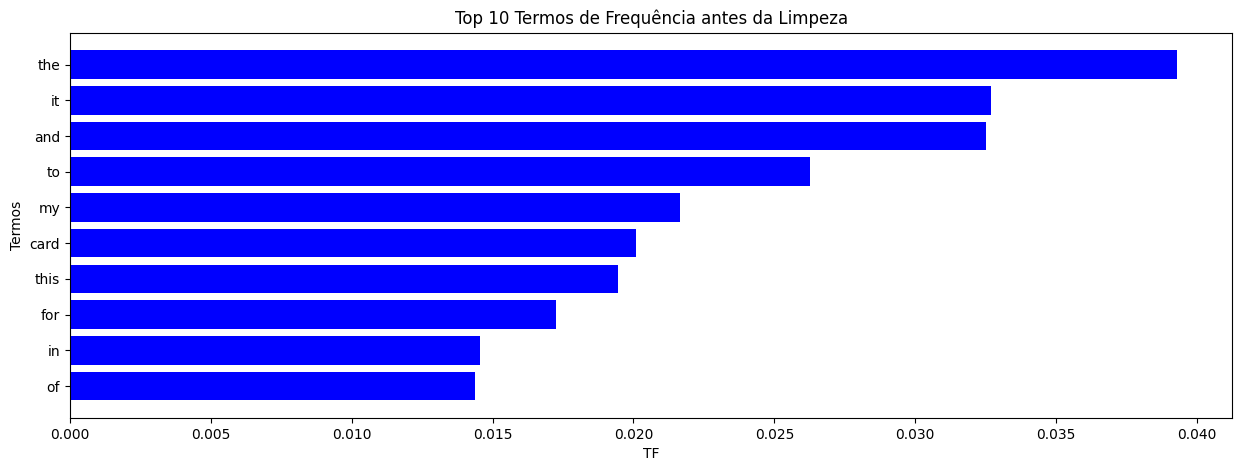

In [ ]:
import matplotlib.pyplot as plt
# Criar o gráfico de barras horizontais
plt.figure(figsize=(15, 5))
plt.barh(y=top_terms.index, width=top_terms.values, color='blue')
plt.title("Top 10 Termos de Frequência antes da Limpeza")
plt.xlabel("TF")
plt.ylabel("Termos")

# Inverter a ordem do eixo y para que os maiores fiquem no topo
plt.gca().invert_yaxis()
plt.show()

<Axes: xlabel='overall'>

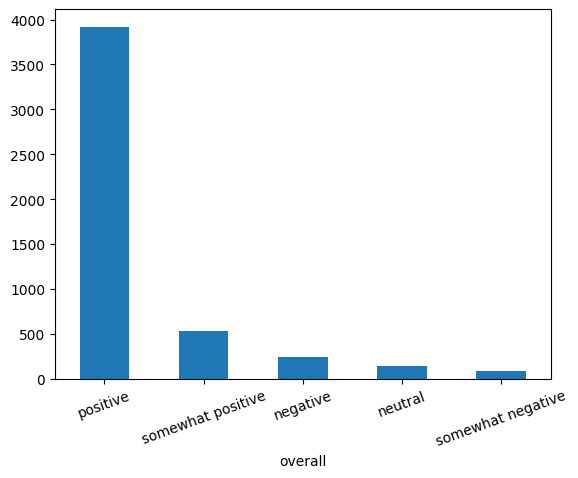

In [ ]:
# Frequência dos Labels
label = pd.DataFrame()
label['overall'] = np.where(train_Y.values==1, 'negative', np.where(train_Y.values==2, 'somewhat negative', np.where(train_Y.values==3, 'neutral', np.where(train_Y.values==4, 'somewhat positive', 'positive'))))
label['overall'].value_counts().plot(kind='bar', rot=20)

Antes da limpeza, percebe-se que os dados estão desbalanceados. Os 5 elementos com maiores TF foram: the (0.039291), it (0.032705), and (0.032509), to (0.026255), my (0.021646). Portanto, tanta sujeira dificultaria uma análise de sentimento.

Ademais, os labels tendem para o aspecto positivo, o que resultaria em um treinamento tendencioso e resultados falhos na etapa do teste.

# **3.2.Limpeza e Análise de Balanceamento dos Dados**

Nessa etapa será efetuada a limpeza dos dados, bem como será efetuada a análise de balanceamento após a limpeza. Ademais, serão plotados gráficos, tal qual wordCloud.

# **3.2.1 Limpeza dos Dados**

In [ ]:
# Exibir a lista de stop words
print(stopwords)

<WordListCorpusReader in '/root/nltk_data/corpora/stopwords'>


In [ ]:

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Baixar stop words e outros recursos necessários
nltk.download('stopwords')
nltk.download('punkt')

# Definindo a função de pré-processamento
def preprocess(text):
    # Substitui quebras de linha por espaço
    text = re.sub(r"\n", " ", text)
    # Remove hyperlinks
    text = re.sub(r'https?://[^\s]+', ' ', text)
    # Remove caracteres especiais
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converte para minúsculas
    text = text.lower()
    # Remove espaços em branco extras
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

def text_clean(data):
    # Inicializa as stop words
    stop_words = set(stopwords.words('english'))

    # Adiciona palavras específicas para remoção
    additional_stopwords = {'amazon'}

    # Remove algumas palavras da lista de stop words
    stop_words = stop_words - {'not', 'no'}
    stop_words = stop_words.union(additional_stopwords)

    cleaned_texts = []

    for text in data:
        # Pré-processar o texto
        text = preprocess(text)

        # Tokeniza o texto
        tokens = word_tokenize(text)

        # Remove stop words
        tokens = [word for word in tokens if word not in stop_words]

        # Remove palavras contextuais
        con_words = ['buy', 'sell', 'bought', 'sold', 'ive', 'would', 'get', 'got', 'dont', 'one', 'using','use']
        final_tokens = [word for word in tokens if word not in con_words]

        # Junta os tokens em uma string
        cleaned_text = ' '.join(final_tokens)
        cleaned_texts.append(cleaned_text)

    return cleaned_texts

# Limpeza dos textos
cleaned_reviews = text_clean(train_X['reviewText'])

# Exibe alguns exemplos de textos limpos
for idx, review in enumerate(cleaned_reviews[:10]):  # Exibir os primeiros 10
    print(f"========== Review {idx + 1} ==========")
    print(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


========== Review 1 ==========
no issues
========== Review 2 ==========
purchased device worked advertised never much phone memory since download lot stuff no brainer
========== Review 3 ==========
works expected sprung higher capacity think made bit cheesier earlier versions paint looks not clean
========== Review 4 ==========
think worked greathad diff bran gb card went south monthsthis held pretty well since note update months zero issues since transferred note note card reliable solidcheers
========== Review 5 ==========
retail packaging arrived legit orange envelope english version not asian like picture shows arrived quickly retail packaging htc sv lg optimus cards working order probably best price youll nice sd card
========== Review 6 ==========
mini storage doesnt anything else not supposed purchased add additional storage microsoft surface pro tablet come gb supposed sandisk long standing reputation speaks
========== Review 7 ==========
phone never skips beat file transfers s

# **3.2.2 Análise de balanceamento após a limpeza**

In [ ]:

# DataFrame
train_Y = train['overall']
train_X = train.drop(['overall'], axis=1)

# Limpeza dos textos
cleaned_reviews = text_clean(train_X['reviewText'])

# # Criar o DataFrame 'data' com a coluna 'overall' e a coluna 'review_limpo'
data = pd.DataFrame({
    'overall': train_Y,
    'review_limpo': cleaned_reviews
})

# Exibição do novo DataFrame
print(data.head())

# Usar CountVectorizer para contar as palavras nos textos limpos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_reviews)

# Criação de um DataFrame para armazenar contagens e TF
unique_tokens = vectorizer.get_feature_names_out()
tf_df = pd.DataFrame(data=np.zeros((2, len(unique_tokens))), columns=unique_tokens, index=["N", "TF"])

# Conta a frequência de cada token
tf_df.loc["N"] = X.sum(axis=0).A1

# Calcula TF (Term Frequency)
total_tokens = tf_df.loc["N"].sum()  # Total de todas as contagens
tf_df.loc["TF"] = tf_df.loc["N"] / total_tokens if total_tokens > 0 else 0

# Calcular IDF
total_documents = X.shape[0]  # Total de documentos
idf_values = np.log10(total_documents / (X > 0).sum(axis=0))  # Usando a soma das ocorrências

# Criação de um DataFrame para armazenar IDF
idf_df = pd.DataFrame(idf_values.T, index=unique_tokens, columns=['IDF'])

# Criação de um DataFrame para armazenar o TF-IDF
tf_idf_df = pd.DataFrame(index=unique_tokens, columns=['TF-IDF'])

# Calcular o TF-IDF
for token in unique_tokens:
    tf_idf_df.at[token, 'TF-IDF'] = tf_df.at["TF", token] * idf_df.at[token, 'IDF']

# Exibir os DataFrames com as contagens, N, TF, IDF e TF-IDF
print("\nDataFrame de Contagens (N e TF):")
print(tf_df)

print("\nDataFrame de IDF:")
print(idf_df)

# Exibir o DataFrame com os resultados de TF-IDF
print(tf_idf_df)




   overall                                       review_limpo
0      4.0                                          no issues
1      5.0  purchased device worked advertised never much ...
2      4.0  works expected sprung higher capacity think ma...
3      5.0  think worked greathad diff bran gb card went s...
4      5.0  retail packaging arrived legit orange envelope...

DataFrame de Contagens (N e TF):
         aac       aas       aba   abdroid  abilities    ability       able  \
N   1.000000  1.000000  1.000000  1.000000   1.000000  20.000000  198.00000   
TF  0.000008  0.000008  0.000008  0.000008   0.000008   0.000167    0.00165   

    aboutgood    abouti  abouttherehere  ...        zl     zone    zoning  \
N    1.000000  1.000000        1.000000  ...  1.000000  6.00000  1.000000   
TF   0.000008  0.000008        0.000008  ...  0.000008  0.00005  0.000008   

        zoom        zs       zte     ztpad      zumo      zune    zunehd  
N   2.000000  1.000000  2.000000  1.000000  1.000

In [ ]:

# Combinar os DataFrames em um único DataFrame
combined_df = pd.concat([tf_df.loc["TF"], idf_df['IDF'], tf_idf_df['TF-IDF']], axis=1)
combined_df.columns = ['TF', 'IDF', 'TF-IDF']
print(combined_df)


                 TF       IDF    TF-IDF
aac        0.000008  3.691435  0.000031
aas        0.000008  3.691435  0.000031
aba        0.000008  3.691435  0.000031
abdroid    0.000008  3.691435  0.000031
abilities  0.000008  3.691435  0.000031
...             ...       ...       ...
zte        0.000017  3.390405  0.000057
ztpad      0.000008  3.691435  0.000031
zumo       0.000008  3.691435  0.000031
zune       0.000017  3.390405  0.000057
zunehd     0.000008  3.691435  0.000031

[9663 rows x 3 columns]


In [ ]:
# Ordenar o DataFrame pelo valor de TF-IDF do maior para o menor
combined_df = combined_df.sort_values(by='TF-IDF', ascending=False)

# Exibir o DataFrame combinado e ordenado
print("DataFrame Combinado de TF, IDF e TF-IDF (ordenado pelo TF-IDF):")
print(combined_df)

DataFrame Combinado de TF, IDF e TF-IDF (ordenado pelo TF-IDF):
                       TF       IDF    TF-IDF
card             0.038369  0.337519   0.01295
gb               0.014379  0.663678  0.009543
phone            0.014045  0.648073  0.009102
not              0.012595  0.650042  0.008187
memory           0.011345  0.678598  0.007698
...                   ...       ...       ...
insurance        0.000008  3.691435  0.000031
instructionsand  0.000008  3.691435  0.000031
instructional    0.000008  3.691435  0.000031
instruction      0.000008  3.691435  0.000031
zunehd           0.000008  3.691435  0.000031

[9663 rows x 3 columns]


In [ ]:
# Ordenamento do DataFrame pelo valor de TF-IDF do maior para o menor
combined_df = combined_df.sort_values(by='TF-IDF', ascending=False)

# Exibição dos 50 primeiros termos do DataFrame combinado e ordenado
print("DataFrame Combinado de TF, IDF e TF-IDF (ordenado pelo TF-IDF):")
print(combined_df.head(50))

DataFrame Combinado de TF, IDF e TF-IDF (ordenado pelo TF-IDF):
                 TF       IDF    TF-IDF
card       0.038369  0.337519   0.01295
gb         0.014379  0.663678  0.009543
phone      0.014045  0.648073  0.009102
not        0.012595  0.650042  0.008187
memory     0.011345  0.678598  0.007698
sandisk    0.010720  0.713255  0.007646
sd         0.009994  0.759977  0.007595
great      0.012045  0.595221  0.007169
no         0.010511  0.666949   0.00701
works      0.012995  0.533978  0.006939
cards      0.007785  0.880531  0.006855
galaxy     0.008527  0.728592  0.006213
good       0.007427  0.802133  0.005957
fast       0.007560  0.778682  0.005887
samsung    0.006902  0.824557  0.005691
price      0.007019  0.803256  0.005638
storage    0.006302  0.877188  0.005528
class      0.005210  1.054947  0.005496
speed      0.005360  0.995079  0.005333
tablet     0.005360  0.989867  0.005305
well       0.005643  0.909680  0.005133
music      0.005018  0.977105  0.004903
camera     0.004

In [ ]:
# Determinar os 50 maiores termos com base nas contagens
top_terms = tf_df.loc["TF"].nlargest(50)

# Exibir os 50 maiores termos e suas contagens
print("Os 50 maiores termos e suas contagens (pós limpeza):")
print(top_terms)

Os 50 maiores termos e suas contagens (pós limpeza):
card         0.038369
gb           0.014379
phone        0.014045
works        0.012995
not          0.012595
great        0.012045
memory       0.011345
sandisk      0.010720
no           0.010511
sd           0.009994
galaxy       0.008527
cards        0.007785
fast         0.007560
good         0.007427
price        0.007019
samsung      0.006902
storage      0.006302
well         0.005643
speed        0.005360
tablet       0.005360
class        0.005210
music        0.005018
product      0.004410
micro        0.004401
camera       0.004334
like         0.004334
note         0.004259
adapter      0.004143
work         0.004043
problems     0.003851
worked       0.003834
space        0.003818
issues       0.003751
used         0.003751
video        0.003543
new          0.003526
time         0.003484
files        0.003376
much         0.003359
data         0.003334
need         0.003334
recommend    0.003268
microsd      0.003251
p

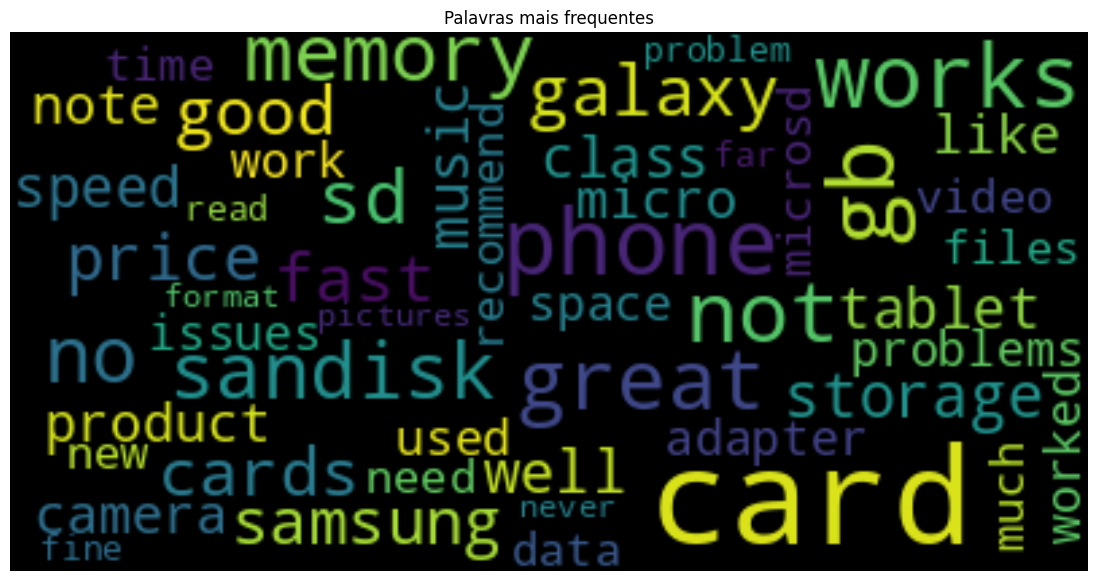

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 50 termos mais frequentes e suas contagens
top_terms = tf_df.loc["TF"].nlargest(50)

# Dicionário com os termos e suas frequências
term_frequencies = dict(top_terms)

# Nuvem de palavras
wordcloud = WordCloud(max_font_size=50, background_color="black").generate_from_frequencies(term_frequencies)

# Exibir a imagem gerada
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Palavras mais frequentes")
plt.axis("off")
plt.show()

# ***4.Stemming e Lematização***


# **4.1.Stemming**

In [ ]:
#Stemming

from nltk.stem import PorterStemmer

# Baixar stop words e outros recursos necessários
nltk.download('stopwords')
nltk.download('punkt')

# Definindo a função de pré-processamento
def preprocess(text):
    # Substitui quebras de linha por espaço
    text = re.sub(r"\n", " ", text)
    # Remove hyperlinks
    text = re.sub(r'https?://[^\s]+', ' ', text)
    # Remove caracteres especiais
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Converte para minúsculas
    text = text.lower()
    # Remove espaços em branco extras
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

def text_clean(data):
    # Inicializa as stop words e o stemmer
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    # Adiciona palavras específicas para remoção
    additional_stopwords = {'amazon'}

    # Remove algumas palavras da lista de stop words
    stop_words = stop_words - {'not', 'no'}
    stop_words = stop_words.union(additional_stopwords)

    cleaned_texts = []

    for text in data:
        # Pré-processar o texto
        text = preprocess(text)

        # Tokeniza o texto
        tokens = word_tokenize(text)

        # Remove stop words
        tokens = [word for word in tokens if word not in stop_words]

        # Remove palavras contextuais
        con_words = ['buy', 'sell', 'bought', 'sold', 'ive', 'would', 'get', 'got', 'dont', 'one', 'using','use']
        tokens = [word for word in tokens if word not in con_words]

        # Aplica o stemming
        stemmed_tokens = [stemmer.stem(word) for word in tokens]

        # Junta os tokens em uma string
        cleaned_text = ' '.join(stemmed_tokens)
        cleaned_texts.append(cleaned_text)

    return cleaned_texts

# Limpeza dos textos
cleaned_reviews = text_clean(train_X['reviewText'])

# Exibição de textos limpos
for idx, review in enumerate(cleaned_reviews[:10]):  # Exibir os primeiros 10
    print(f"========== Review {idx + 1} ==========")
    print(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


========== Review 1 ==========
no issu
========== Review 2 ==========
purchas devic work advertis never much phone memori sinc download lot stuff no brainer
========== Review 3 ==========
work expect sprung higher capac think made bit cheesier earlier version paint look not clean
========== Review 4 ==========
think work greathad diff bran gb card went south monthsthi held pretti well sinc note updat month zero issu sinc transfer note note card reliabl solidch
========== Review 5 ==========
retail packag arriv legit orang envelop english version not asian like pictur show arriv quickli retail packag htc sv lg optimu card work order probabl best price youll nice sd card
========== Review 6 ==========
mini storag doesnt anyth els not suppos purchas add addit storag microsoft surfac pro tablet come gb suppos sandisk long stand reput speak
========== Review 7 ==========
phone never skip beat file transfer speedi not corrupt issu memori fade issu expect sandisk brand great card entrust prec

In [ ]:

# Usar CountVectorizer para contar as palavras nos textos limpos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_reviews)

# Criação de um DataFrame para armazenar contagens e TF
unique_tokens = vectorizer.get_feature_names_out()
tf_df = pd.DataFrame(data=np.zeros((2, len(unique_tokens))), columns=unique_tokens, index=["N", "TF"])

# Conta a frequência de cada token
tf_df.loc["N"] = X.sum(axis=0).A1  # Somar as contagens diretamente

# Calcula TF (Term Frequency)
total_tokens = tf_df.loc["N"].sum()  # Total de todas as contagens
tf_df.loc["TF"] = tf_df.loc["N"] / total_tokens if total_tokens > 0 else 0

# Exibição do DataFrame com as contagens e TF
print("\nDataFrame de N e TF:")
print(tf_df)

# Calcular IDF
total_documents = X.shape[0]  # Total de documentos
idf_values = np.log10(total_documents / (X > 0).sum(axis=0))  # Usando a soma das ocorrências

# Criação de um DataFrame para armazenar IDF
idf_df = pd.DataFrame(idf_values.T, index=unique_tokens, columns=['IDF'])

# Criação de um DataFrame para armazenar o TF-IDF
tf_idf_df = pd.DataFrame(index=unique_tokens, columns=['TF-IDF'])

# Calcular o TF-IDF
for token in unique_tokens:
    tf_idf_df.at[token, 'TF-IDF'] = tf_df.at["TF", token] * idf_df.at[token, 'IDF']

# Exibição do DataFrame de IDF
print("\nDataFrame de IDF:")
print(idf_df)

# Exibição do DataFrame com os resultados de TF-IDF
print("\nDataFrame de TF-IDF:")
print(tf_idf_df)


DataFrame de N e TF:
          aa       aac       aba   abdroid       abil        abl  aboutgood  \
N   1.000000  1.000000  1.000000  1.000000  21.000000  198.00000   1.000000   
TF  0.000008  0.000008  0.000008  0.000008   0.000175    0.00165   0.000008   

      abouti  aboutthereher   aboutto  ...     zippi        zl      zone  \
N   1.000000       1.000000  1.000000  ...  1.000000  1.000000  7.000000   
TF  0.000008       0.000008  0.000008  ...  0.000008  0.000008  0.000058   

        zoom        zs       zte     ztpad      zumo      zune    zunehd  
N   2.000000  1.000000  2.000000  1.000000  1.000000  2.000000  1.000000  
TF  0.000017  0.000008  0.000017  0.000008  0.000008  0.000017  0.000008  

[2 rows x 7449 columns]

DataFrame de IDF:
              IDF
aa       3.691435
aac      3.691435
aba      3.691435
abdroid  3.691435
abil     2.369216
...           ...
zte      3.390405
ztpad    3.691435
zumo     3.691435
zune     3.390405
zunehd   3.691435

[7449 rows x 1 columns]



In [ ]:
# 50 maiores termos com base em TF (Pós Stemming)
top_terms2 = tf_df.loc["TF"].nlargest(50)

# Exibição dos 50 maiores termos de Frequência
print("Os 50 maiores Termos de Frequência, pós stemming:")
print(top_terms2)

Os 50 maiores Termos de Frequência, pós stemming:
card         0.046154
work         0.023123
phone        0.015913
gb           0.014637
not          0.012595
great        0.012053
memori       0.011486
sandisk      0.010961
no           0.010511
sd           0.010078
galaxi       0.008561
price        0.007902
speed        0.007702
fast         0.007560
good         0.007452
problem      0.007069
samsung      0.006969
storag       0.006302
tablet       0.006060
video        0.005977
need         0.005935
product      0.005802
format       0.005677
well         0.005643
camera       0.005335
class        0.005251
issu         0.005118
music        0.005043
devic        0.004868
like         0.004735
file         0.004526
purchas      0.004501
micro        0.004426
transfer     0.004418
adapt        0.004393
read         0.004351
time         0.004334
note         0.004326
recommend    0.004268
use          0.004176
say          0.003993
write        0.003834
space        0.003826
go  

# **4.2.Lematização**

In [ ]:

from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Função para mapear tags para o formato do WordNet
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # Default para substantivo

# Definindo a função de pré-processamento
def preprocess(text):
    text = re.sub(r"\n", " ", text)
    text = re.sub(r'https?://[^\s]+', ' ', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)

    return text.strip()

def text_clean(data):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    additional_stopwords = {'amazon'}
    stop_words = stop_words - {'not', 'no'}
    stop_words = stop_words.union(additional_stopwords)

    cleaned_texts = []

    for text in data:
        text = preprocess(text)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]

        con_words = ['buy', 'sell', 'bought', 'sold', 'ive', 'would', 'get', 'got', 'dont', 'one', 'using','use']
        tokens = [word for word in tokens if word not in con_words]

        # Obter as tags das palavras
        pos_tags = nltk.pos_tag(tokens)

        # Aplicação da lematização usando a tag correta
        lemmatized_tokens = [
            lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags
        ]

        cleaned_text = ' '.join(lemmatized_tokens)
        cleaned_texts.append(cleaned_text)

    return cleaned_texts

# Limpeza dos textos
cleaned_reviews = text_clean(train_X['reviewText'])

# Usar CountVectorizer para contar as palavras nos textos limpos
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_reviews)

# Criação de um DataFrame para armazenar contagens e TF
unique_tokens = vectorizer.get_feature_names_out()
tf_df = pd.DataFrame(data=np.zeros((2, len(unique_tokens))), columns=unique_tokens, index=["N", "TF"])

# Conta a frequência de cada token
tf_df.loc["N"] = X.sum(axis=0).A1  # Somar as contagens diretamente

# Calcula TF (Term Frequency)
total_tokens = tf_df.loc["N"].sum()  # Total de todas as contagens
tf_df.loc["TF"] = tf_df.loc["N"] / total_tokens if total_tokens > 0 else 0

# Exibir o DataFrame com as contagens e TF
print("\nDataFrame de N e TF:")
print(tf_df)

# Calcular IDF
total_documents = X.shape[0]  # Total de documentos
idf_values = np.log10(total_documents / (X > 0).sum(axis=0))

# Criação de um DataFrame para armazenar IDF
idf_df = pd.DataFrame(idf_values.T, index=unique_tokens, columns=['IDF'])

# Criação de um DataFrame para armazenar o TF-IDF
tf_idf_df = pd.DataFrame(index=unique_tokens, columns=['TF-IDF'])

# Calcular o TF-IDF
for token in unique_tokens:
    tf_idf_df.at[token, 'TF-IDF'] = tf_df.at["TF", token] * idf_df.at[token, 'IDF']

# Exibição do DataFrame de IDF
print("\nDataFrame de IDF:")
print(idf_df)

# Exibição do DataFrame com os resultados de TF-IDF
print("\nDataFrame de TF-IDF:")
print(tf_idf_df)


DataFrame de N e TF:
         aac       aas       aba   abdroid    ability        able  aboutgood  \
N   1.000000  1.000000  1.000000  1.000000  21.000000  198.000000   1.000000   
TF  0.000008  0.000008  0.000008  0.000008   0.000175    0.001652   0.000008   

      abouti  abouttherehere   aboutto  ...       zip     zippy        zl  \
N   1.000000        1.000000  1.000000  ...  9.000000  1.000000  1.000000   
TF  0.000008        0.000008  0.000008  ...  0.000075  0.000008  0.000008   

        zone      zoom       zte     ztpad      zumo      zune    zunehd  
N   7.000000  2.000000  2.000000  1.000000  1.000000  2.000000  1.000000  
TF  0.000058  0.000017  0.000017  0.000008  0.000008  0.000017  0.000008  

[2 rows x 8399 columns]

DataFrame de IDF:
              IDF
aac      3.691435
aas      3.691435
aba      3.691435
abdroid  3.691435
ability  2.369216
...           ...
zte      3.390405
ztpad    3.691435
zumo     3.691435
zune     3.390405
zunehd   3.691435

[8399 rows x 1 colu

In [ ]:
# 5o maiores termos com base nos Termos de Frequência (Lematização)
top_terms3 = tf_df.loc["TF"].nlargest(50)

# Exibir os 5 maiores termos e suas contagens
print("Os 50 maiores termos, pós Lematização, e suas contagens:")
print(top_terms3)

Os 50 maiores termos, pós Lematização, e suas contagens:
card         0.046206
work         0.022924
phone        0.015922
gb           0.014529
not          0.012609
great        0.012167
memory       0.011499
sandisk      0.010732
no           0.010523
sd           0.010072
galaxy       0.008545
fast         0.008228
good         0.007853
price        0.007836
speed        0.007711
problem      0.007077
samsung      0.006910
well         0.006442
storage      0.006309
tablet       0.006000
need         0.005858
product      0.005766
class        0.005249
format       0.005199
go           0.005174
camera       0.005149
issue        0.005124
music        0.005040
device       0.004873
video        0.004873
say          0.004865
like         0.004540
file         0.004515
micro        0.004406
adapter      0.004373
transfer     0.004339
note         0.004331
purchase     0.004306
time         0.004298
read         0.004206
take         0.004189
recommend    0.004081
come         0.0040

**Stemming e Lemanization nas palavras com maior Termo de Frequência**





In [ ]:
#Aplicação do Stemming e Lemanization nas 50 palavras com maior Termo de Frequência -TF

# Lista de palavras
palavras_frequentes = [
    "card", "gb", "phone", "works", "not", "great", "memory",
    "sandisk", "no", "sd", "use", "galaxy", "cards", "fast",
    "good", "price", "samsung", "storage", "well", "speed",
    "tablet", "class", "music", "product", "micro", "camera",
    "like", "note", "adapter", "work", "problems", "worked",
    "space", "issues", "used", "video", "new", "time", "files",
    "much", "data", "need", "recommend", "microsd", "problem",
    "read", "far", "fine", "pictures", "format"
]

# Inicializando o stemmer e lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Aplicando Stemming
palavras_stemming = [stemmer.stem(palavra) for palavra in palavras_frequentes]

# Aplicando Lematização
palavras_lemmatizacao = [lemmatizer.lemmatize(palavra) for palavra in palavras_stemming]

# Resultados
print("Palavras Frequentes:")
print(palavras_frequentes )
print("\nPalavras após Stemming:")
print(palavras_stemming)
print("\nPalavras após Lematização:")
print(palavras_lemmatizacao)

Palavras Frequentes:
['card', 'gb', 'phone', 'works', 'not', 'great', 'memory', 'sandisk', 'no', 'sd', 'use', 'galaxy', 'cards', 'fast', 'good', 'price', 'samsung', 'storage', 'well', 'speed', 'tablet', 'class', 'music', 'product', 'micro', 'camera', 'like', 'note', 'adapter', 'work', 'problems', 'worked', 'space', 'issues', 'used', 'video', 'new', 'time', 'files', 'much', 'data', 'need', 'recommend', 'microsd', 'problem', 'read', 'far', 'fine', 'pictures', 'format']

Palavras após Stemming:
['card', 'gb', 'phone', 'work', 'not', 'great', 'memori', 'sandisk', 'no', 'sd', 'use', 'galaxi', 'card', 'fast', 'good', 'price', 'samsung', 'storag', 'well', 'speed', 'tablet', 'class', 'music', 'product', 'micro', 'camera', 'like', 'note', 'adapt', 'work', 'problem', 'work', 'space', 'issu', 'use', 'video', 'new', 'time', 'file', 'much', 'data', 'need', 'recommend', 'microsd', 'problem', 'read', 'far', 'fine', 'pictur', 'format']

Palavras após Lematização:
['card', 'gb', 'phone', 'work', 'not',

**CONCLUSÃO:**

A maioria das palavras desse dataframe são substantivos e adjetivos sem flexões, logo não ocorreram grandes mudanças de posicionamento após a lematização ou stemming. Um exemplo disso pode ser observado acima, através da amostra dos 50 termos com maior TF.

# **5. Classificação - K Nearest Neighbors**

# **Divisão treino-teste**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Supondo que 'data' seja o DataFrame com as colunas 'review_limpo' e 'overall'
X = data['review_limpo']  # Textos limpos
y = data['overall']        # Rótulos

# Transformar textos em valores numéricos
vectorizer = TfidfVectorizer()
X_transformed = vectorizer.fit_transform(X)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)



**Dados de treino**

**Features**

In [ ]:
X_train

<3685x9663 sparse matrix of type '<class 'numpy.float64'>'
	with 79255 stored elements in Compressed Sparse Row format>

**Target**

In [ ]:
y_train

,overall
3319,5.0
2819,5.0
1813,1.0
1478,5.0
2630,5.0
...,...
4427,5.0
467,5.0
3093,5.0
3773,5.0


**Dados de teste**

**Features**

In [ ]:
X_test

<1229x9663 sparse matrix of type '<class 'numpy.float64'>'
	with 25977 stored elements in Compressed Sparse Row format>

**Target**

In [ ]:
y_test

,overall
2347,5.0
4344,1.0
692,5.0
3910,5.0
2488,4.0
...,...
3823,5.0
2568,5.0
3843,4.0
623,2.0


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Treinar o modelo KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

**Previsões e Avaliações**

In [ ]:
y_pred = knn.predict(X_test)
print(y_pred)

[4. 1. 5. ... 5. 1. 5.]


In [ ]:
accuracy = knn.score(X_test, y_test)
print(f'Acurácia do modelo: {accuracy:.2f}')

Acurácia do modelo: 0.79


**Matriz de Confusão e Relatório de Classificação**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay, accuracy_score

<Figure size 1600x1200 with 0 Axes>

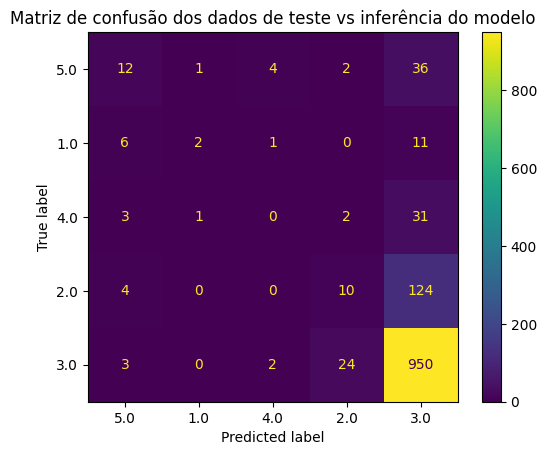

In [ ]:
plt.figure(figsize = (16,12))
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
cmd.plot()
plt.title("Matriz de confusão dos dados de teste vs inferência do modelo")
plt.show()

**Classification Report**

**Dados de teste**

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         1.0       0.43      0.22      0.29        55
         2.0       0.50      0.10      0.17        20
         3.0       0.00      0.00      0.00        37
         4.0       0.26      0.07      0.11       138
         5.0       0.82      0.97      0.89       979

    accuracy                           0.79      1229
   macro avg       0.40      0.27      0.29      1229
weighted avg       0.71      0.79      0.74      1229




A acurácia geral é relativamente boa (79%), mas a avaliação por classe sugere que há um desbalanceamento no desempenho do modelo. A razão pode ser causada pela pequena quantidade de dados para treinamento nas classes 1, 2, 3 e 4.

A classe 5.0 parece ser bem prevista (alta precisão, revocação e F1-Score), enquanto outras classes, especialmente 3.0, apresentam métricas muito baixas, indicando que o modelo pode ter dificuldade em identificá-las corretamente.


**Score do modelo utilizando os dados de teste.**

In [ ]:
knn.score(X=X_test, y=y_test)

0.7925142392188771

**Curva ROC**

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

In [ ]:
label_binarizer = LabelBinarizer().fit(df['overall'])

In [ ]:
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(1229, 5)

Selecionando a qualidade de número 5 pois foi o maior valor obtido pelo modelo.

In [ ]:
class_of_interest = 5
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

4

**Calculando as probabilidades dos dados de teste para fazer o cálculo da curva ROC.**

In [ ]:
y_scores = knn.predict_proba(X_test)

In [ ]:
def plot_curva_ROC_one_vs_rest(y_test, y_scores):

  RocCurveDisplay.from_predictions(
      y_onehot_test[:, class_id],
      y_scores[:, class_id],
      name=f"{class_of_interest} vs as demais classes",
  )
  plt.plot([0, 1], [0, 1], "k--", label="valor de threashold (AUC = 0.5)")
  plt.axis("square")
  plt.xlabel("Taxa de Falso Positivo")
  plt.ylabel("Taxa de Verdadeira Positivo")
  plt.title("One-vs-Resto curva ROC")
  plt.legend()
  plt.show()

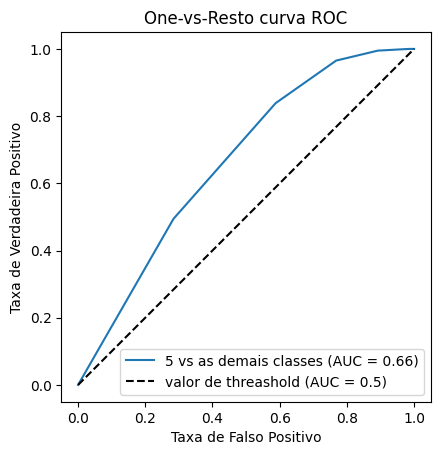

In [ ]:
plot_curva_ROC_one_vs_rest(y_test, y_scores)

**Escolhendo o valor K**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error

def train_modelo(X_train, X_test, y_train, k=1):
  print(f"Treinando o k-NN com k={k}")

  # Criação da instância do modelo KNN com n_neighbors=k
  # knn = KNeighborsClassifier(n_neighbors=k)
  knn = KNeighborsRegressor(n_neighbors=k)

  # Ajuste do modelo aos dados de treinamento
  knn.fit(X_train, y_train)

  # Previsões nos dados de teste
  pred_i = knn.predict(X_test)

  return pred_i

In [ ]:
error_rate = []

for i in range(1,41):
    pred_i = train_modelo(X_train, X_test, y_train, i)
    #calculo e armazenamento dos valores de erro para cada modelo treinado
    error = sqrt(mean_squared_error(y_test,pred_i))
    error_rate.append(error)

Treinando o k-NN com k=1
Treinando o k-NN com k=2
Treinando o k-NN com k=3
Treinando o k-NN com k=4
Treinando o k-NN com k=5
Treinando o k-NN com k=6
Treinando o k-NN com k=7
Treinando o k-NN com k=8
Treinando o k-NN com k=9
Treinando o k-NN com k=10
Treinando o k-NN com k=11
Treinando o k-NN com k=12
Treinando o k-NN com k=13
Treinando o k-NN com k=14
Treinando o k-NN com k=15
Treinando o k-NN com k=16
Treinando o k-NN com k=17
Treinando o k-NN com k=18
Treinando o k-NN com k=19
Treinando o k-NN com k=20
Treinando o k-NN com k=21
Treinando o k-NN com k=22
Treinando o k-NN com k=23
Treinando o k-NN com k=24
Treinando o k-NN com k=25
Treinando o k-NN com k=26
Treinando o k-NN com k=27
Treinando o k-NN com k=28
Treinando o k-NN com k=29
Treinando o k-NN com k=30
Treinando o k-NN com k=31
Treinando o k-NN com k=32
Treinando o k-NN com k=33
Treinando o k-NN com k=34
Treinando o k-NN com k=35
Treinando o k-NN com k=36
Treinando o k-NN com k=37
Treinando o k-NN com k=38
Treinando o k-NN com 

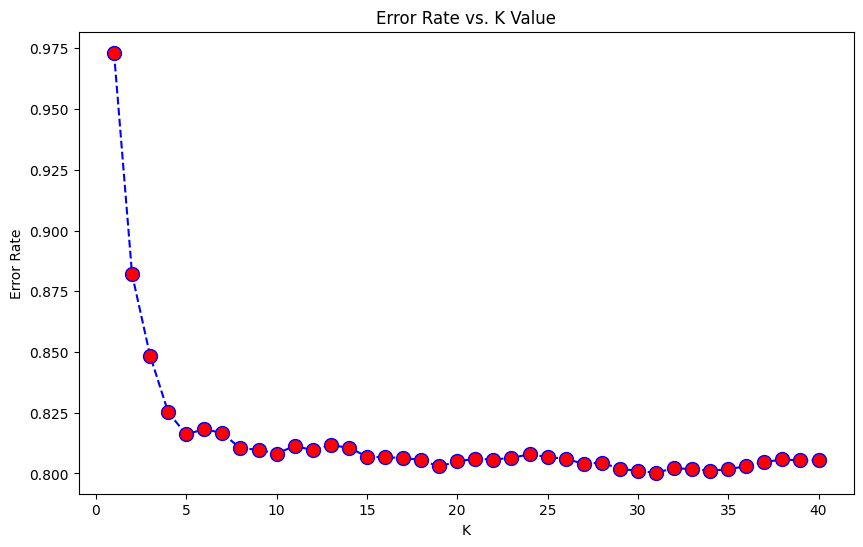

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
# Função para treinar o modelo k-NN e fazer previsões
def train_modelo(X_train_scaled, X_test_scaled, y_train, n_neighbors):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test)
    return y_pred

# Listas para armazenar resultados
k_values = range(1, 41)
res_score = []

for k in k_values:
    pred_i = train_modelo(X_train, X_test, y_train, k)

    #calcule e armazene os valores de score para cada modelo treinado
    score = accuracy_score(y_test, pred_i)  # Calcule a acurácia
    res_score.append(score)  # Armazene o valor de acurácia
    # Imprimir a lista de acurácias após o loop
print("Acurácias para cada valor de k:", res_score)

Acurácias para cada valor de k: [0.724979658258747, 0.6395443449959316, 0.7664768104149715, 0.7672904800650936, 0.7925142392188771, 0.7949552481692432, 0.7990235964198535, 0.8014646053702197, 0.8014646053702197, 0.8014646053702197, 0.8014646053702197, 0.8006509357200976, 0.8022782750203418, 0.8030919446704637, 0.8030919446704637, 0.8022782750203418, 0.8030919446704637, 0.8030919446704637, 0.8022782750203418, 0.7998372660699756, 0.8006509357200976, 0.8014646053702197, 0.8006509357200976, 0.8006509357200976, 0.7998372660699756, 0.7990235964198535, 0.7990235964198535, 0.7982099267697315, 0.7998372660699756, 0.7982099267697315, 0.7973962571196095, 0.7973962571196095, 0.7973962571196095, 0.7973962571196095, 0.7973962571196095, 0.7973962571196095, 0.7973962571196095, 0.7982099267697315, 0.7982099267697315, 0.7973962571196095]


# Treine seu modelo novamente com novo valor K

In [ ]:
# k=5
# Treine o modelo com k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_3 = knn.predict(X_test)

print(classification_report(y_test,y_pred_3, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.43      0.22      0.29        55
         2.0       0.50      0.10      0.17        20
         3.0       0.00      0.00      0.00        37
         4.0       0.26      0.07      0.11       138
         5.0       0.82      0.97      0.89       979

    accuracy                           0.79      1229
   macro avg       0.40      0.27      0.29      1229
weighted avg       0.71      0.79      0.74      1229



In [ ]:
# Prevendo as probabilidades no conjunto de teste
y_pred_proba_3 = knn.predict_proba(X_test)

# Exibindo as probabilidades
print(y_pred_proba_3)

[[0.  0.  0.  0.6 0.4]
 [0.4 0.  0.2 0.2 0.2]
 [0.  0.  0.  0.2 0.8]
 ...
 [0.  0.  0.  0.2 0.8]
 [0.4 0.  0.  0.4 0.2]
 [0.  0.  0.  0.2 0.8]]


In [ ]:
# Treine o modelo com k=11
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred_11 = knn.predict(X_test)

print(classification_report(y_test,y_pred_11, zero_division=0))

              precision    recall  f1-score   support

         1.0       0.48      0.20      0.28        55
         2.0       0.00      0.00      0.00        20
         3.0       0.00      0.00      0.00        37
         4.0       0.00      0.00      0.00       138
         5.0       0.81      0.99      0.89       979

    accuracy                           0.80      1229
   macro avg       0.26      0.24      0.24      1229
weighted avg       0.67      0.80      0.72      1229



In [ ]:
# Prevendo as probabilidades no conjunto de teste
y_pred_proba_11 = knn.predict_proba(X_test)

# Exibindo as probabilidades
print(y_pred_proba_11)

[[0.         0.         0.         0.27272727 0.72727273]
 [0.36363636 0.         0.09090909 0.36363636 0.18181818]
 [0.         0.         0.         0.18181818 0.81818182]
 ...
 [0.         0.         0.         0.27272727 0.72727273]
 [0.27272727 0.         0.09090909 0.27272727 0.36363636]
 [0.         0.         0.         0.18181818 0.81818182]]


A Mudança no valor de K (de 5 para 11) não resultaram em melhorias nas métricas para a maioria das classes, apenas 0.1 na acurácia geral. O modelo ainda enfrenta dificuldades em classificar adequadamente algumas classes (especialmente a 3.0).

 Assim, em contextos como esse, é importante considerar outras técnicas, como ajuste de hiperparâmetros, tratamento de classes desbalanceadas, ou mesmo testar outros algoritmos, para melhorar a performance do modelo.

 Alguns tratamentos de classes desbalanceadas são apagar dados das classes predominantes, apagar dados de forma estratificada das classes predominantes, gerar dados sintéticos ou capturar dados de outros datasets semelhantes para implementação.



# **Conclusão**


O presente trabalho teve o objetivo principal de realizar uma análise de sentimento e treinar um modelo de classificação (KNN). Nesse contexto, foi realizada a análise exploratória dos dados para compreensão inicial, limpeza, transformações e tratamento dos dados.

O dataframe utilizado possui a classificação de avaliações e comentários de produtos na Amazon. Inicialmente, possuiam 12 colunas, com 4.915 linhas, exceto reviewText e reviewrName. Dessa forma, foi removida a NaN da coluna'reviewText'. Também foi eliminada a coluna "reviewername" para salvaguardar os dados do consumidor.

Os dados foram carregados, as bibliotecas necessárias foram importadas, os dados explorados e transformados.

Outra característica do dataset é que os dados apresentam elementos únicos nas colunas helpful_yes, helpful_no, total_vote e score_pos_neg_diff. O overall, score_average_rating e dispersão dos dados apresentaram predominância de um elemento. E os dados numéricos que percorreram todo o conjunto foi day_diff e index (nome dado posteriormente).

A análise de sentimento foi feita nas seguintes colunas: Overall (labell) e ReviewTex. Inicialmente, foram coletados e analisados os dados, bem como apresentadas medidas como TF, IDF e TF_IDF. Foi observada uma quantidade grande de lixo, de modo que foi essencial realizar a limpeza dos dados da coluna ReviewText.

Após esse tratamento, novamente foram implementadas as medidas TF, IDF e TF_IDF e plotado um gráfico de nuvem para observar os sentimentos das pessoas em relação aos produtos. Foram visualizados muitos itens de consumo, bem como sentimentos como great, good, fast, problems, speed, worked e outros. Confirma-se, portanto, a informação anterior que a maioria dos sentimentos eram positivos (score 5).

Também foi treinado um modelo de classificação KNN. Ocorreu a divisão dos dados em treino e teste. A acurácia inicial do modelo foi 0.79. Foram aplicadas a matriz de confusão e o relatório de classificação, com resultados para precisão, recall, f1-score e support.

Também foi realizada análise via curva ROC e para isso ocorreram transformações binárias. A análise selecionou o número 5 pois foi o maior valor obtido pelo modelo, tido como o de maior qualidade.

O método do cotovelo foi utilizado para escolher um bom valor K e treinar o modelo, com K = 5 e K = 11. A Mudança no valor de K (de 5 para 11) não resultou em melhorias nas métricas para a maioria das classes, apenas 0.1 na acurácia geral (79% para 80%). Concluiu-se que o modelo enfrentava dificuldades em classificar adequadamente algumas classes (especialmente a 3.0).

A acurácia geral é relativamente boa (79%), mas a avaliação por classe sugeriu que houvesse um desbalanceamento no desempenho do modelo. A razão pode ser causada pela pequena quantidade de dados para treinamento nas classes 1, 2, 3 e 4. A classe 5.0, por sua vez, é bem prevista, com alta precisão, revocação e F1-Score.

Enfim, em contextos como esse, é importante considerar outras técnicas, como ajuste de hiperparâmetros, tratamento de classes desbalanceadas, ou mesmo testar outros algoritmos para melhorar a performance do modelo.

Alguns tratamentos para classes desbalanceadas são indispensáveis como apagar dados das classes predominantes, apagar dados de forma estratificada das classes predominantes, gerar dados sintéticos ou capturar dados de outros datasets semelhantes para implementação.

